In [3]:
using PyPlot
#workspace()
include("HistokatControllerImageLoader.jl")
using HistokatControllerImageLoader: getTile, getImageObject, getVoxelSize, getExtent



filenameR = "/Users/jo/data/example-data-LL1_1_CD146-2014.tif"
filenameT = "/Users/jo/data/example-data-LL1_4_KL1-2014.tif"

imageR = getImageObject(filenameR)
imageT = getImageObject(filenameT)

using PyCall
@pyimport histokat

getVoxelSize(imageR)

im = getTile(imageR, 9, 1,1,0)


DeformableRegistration.ImageProcessing.regImage(Float64 ImageMeta with:
  data: 1000×1000 Array{Float64,2}
  properties:, [0.029184, 0.029184], [29184.0, 29184.0])

In [6]:
im.data.data

1000×1000 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  

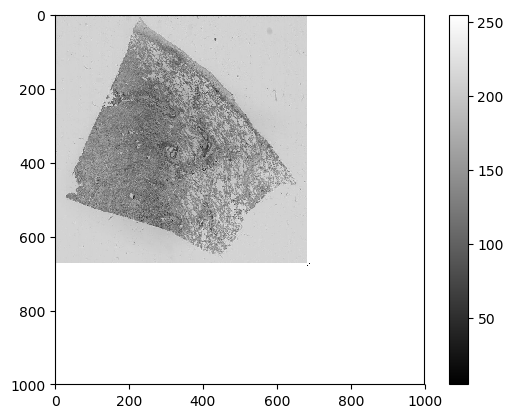

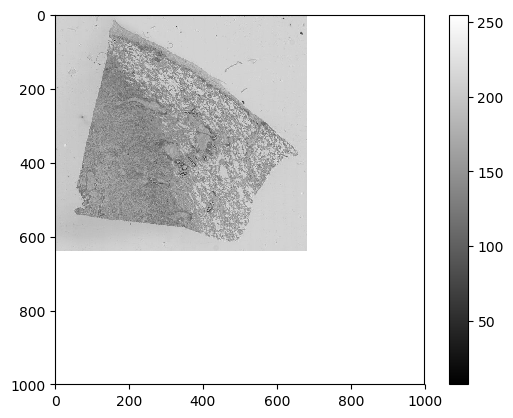

PyObject <matplotlib.colorbar.Colorbar object at 0x12d348be0>

In [15]:
figure()
arr = getTile(imageR, 9, 0,0,0)
removeBlack!(arr)
imshow(arr, cmap="gray")
colorbar()
figure()
arr = getTile(imageT, 9, 0,0,0)
removeBlack!(arr)
imshow(arr, cmap="gray")
colorbar()

In [6]:
a = rand(10,10,3)
sum(a,3)

10×10×1 Array{Float64,3}:
[:, :, 1] =
 1.3886   1.60879   1.98245   1.38437   …  1.65234   1.45076   1.45878 
 1.81121  2.05299   1.61524   1.97189      1.76947   2.00388   2.56751 
 1.83234  2.6167    2.24513   1.74437      1.79163   1.83403   1.7909  
 1.26831  1.11646   0.729276  2.10802      1.30704   0.608446  1.77324 
 1.67342  1.61759   1.7672    1.63755      1.90226   1.11807   1.39599 
 1.78269  0.702731  2.64538   1.18433   …  1.4118    1.29937   1.85771 
 2.08311  2.02979   0.765718  2.14938      0.878283  2.41078   0.951293
 1.55955  2.51319   0.696972  1.46736      1.70849   1.44735   1.16631 
 1.57523  1.7638    1.29833   0.759659     1.34343   1.26794   2.019   
 1.3076   1.7124    1.78588   2.1459       0.174639  0.781784  1.22915 

In [4]:
ENV["PYTHON"]="/usr/local/anaconda3/bin/python"
Pkg.build("PyCall")

INFO: Building Conda
INFO: Building PyCall
INFO: PyCall is using /usr/local/anaconda3/bin/python (Python 3.6.4) at /usr/local/anaconda3/bin/python, libpython = /usr/local/anaconda3/lib/libpython3.6m
INFO: /Users/jo/.julia/v0.6/PyCall/deps/deps.jl has been updated
INFO: /Users/jo/.julia/v0.6/PyCall/deps/PYTHON has been updated
